In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [186]:
n = 50
S0 = 50
r = 0.1
K = 50
sigma = 0.4
T = 0.411
t_arr = np.linspace(0,T,n)

### black scholes

In [187]:
def d1(S, t):
    return (np.log(S/K) + (r+sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))

def d2(S, t):
    return (np.log(S/K) + (r-sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))

def phi(x):
    return norm(loc=0, scale=1).cdf(x)

def V_bs(S, t):
    return S*phi(d1(S, t)) - K*np.exp(-r*(T-t))*phi(d2(S, t))

/tmp/ipykernel_1474/1465466229.py:2: RuntimeWarning: invalid value encountered in true_divide
  return (np.log(S/K) + (r+sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))
/tmp/ipykernel_1474/1465466229.py:5: RuntimeWarning: invalid value encountered in true_divide
  return (np.log(S/K) + (r-sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))


6.0688669438742835

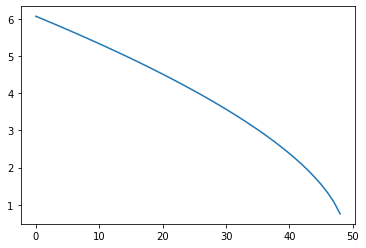

In [188]:
plt.plot(V_bs(S0, t_arr))
V_bs(S0, 0)

# S_arr = np.linspace(S0, 150, 101)
# plt.plot(V_bs(S_arr, T))

### binomial method

In [189]:
dt = t_arr[1]-t_arr[0]
S = np.zeros((n,n))

sx = 0.5 * (np.exp(-r*dt) + np.exp((r+sigma**2)*dt) + sigma*dt)
ux = sx + np.sqrt(sx**2 - 1)
dx = sx - np.sqrt(sx**2 - 1)
px = (np.exp(r*dt)-dx)/(ux-dx)

u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))

p = (np.exp(r*dt)-d)/(u-d)

# creation of binomial tree
for i in range(0,n):
    for j in range(0,i+1):
        S[j,i] = ux**j * dx**(i-j) * S0

print(S)

[[  50.           46.68770224   43.59483081 ...    1.99479063
     1.86264382    1.7392512 ]
 [   0.           53.54729147   50.         ...    2.28787519
     2.13631271    1.99479063]
 [   0.            0.           57.34624848 ...    2.62402118
     2.45019039    2.28787519]
 ...
 [   0.            0.            0.         ... 1253.26435711
  1170.24066264 1092.71695212]
 [   0.            0.            0.         ...    0.
  1342.17823645 1253.26435711]
 [   0.            0.            0.         ...    0.
     0.         1437.40018471]]


In [190]:
# computation of final option price
V = S[:,n-1] - K
V = [0 if x < 0 else x for x in V]

In [191]:
V_new = np.zeros((n,n))
V_new[:, n-1] = V

for i in range(n-2, -1, -1):
    for j in range(i, -1, -1):
        # print(i,j)
        V_new[j, i] = np.exp(-r*dt)*(px*V_new[j+1, i+1] + (1-px)*V_new[j, i+1])

In [192]:
V_new[0,0]

10.373930687698063

In [193]:
def V_calc(V_j,V_j1):
    return np.exp(-r*dt)*(px*V_j1+(1-px)*V_j)

for i in range(n-2, -1, -1):
    for j in range(i, -1, -1):
        # print(i,j)
        V[j] = V_calc(V[j],V[j+1])
V

[533.3882889117162,
 539.2145038722997,
 545.1653868376218,
 551.2456077245272,
 557.4601079722382,
 563.814122850836,
 570.3132061457817,
 576.963257523914,
 583.7705529317172,
 590.741778429737,
 597.8840679294093,
 605.2050453722358,
 612.712871978703,
 620.4162992988572,
 628.324728922224,
 636.4482798573828,
 644.7978647783368,
 653.385276565743,
 662.2232868592791,
 671.3257587006558,
 680.7077758086065,
 690.3857916188098,
 700.3778019836928,
 710.7035464113541,
 721.3847439944894,
 732.4453718198487,
 743.9119957578738,
 755.8141662479608,
 768.1848952281053,
 781.0612350717627,
 794.4849869198927,
 808.5035750899618,
 823.171137457451,
 838.5499003764189,
 854.7119339105946,
 871.7414235852682,
 889.7376563326287,
 908.81901407844,
 929.1284219268664,
 950.8409519692393,
 974.1747200565229,
 999.4069950263486,
 1026.8989147665793,
 1057.1351585157108,
 1090.7913007828795,
 1128.8566696667704,
 1172.8808641081819,
 1225.5390689485048,
 1292.220157645358,
 1387.400184712948]

### 1 step method

In [194]:
s = 0.5 * (np.exp(-r*T) + np.exp((r+sigma**2)*T) + sigma*T)
u_exact = s + np.sqrt(s**2 - 1)
d_exact = s - np.sqrt(s**2 - 1)

In [195]:
Cu = (u_exact*S0 - K) if u_exact*S0 > K else 0
Cd = (d_exact*S0 - K) if d_exact*S0 > K else 0

C0 = np.exp(-r*T) * (p * Cu + (1-p) * Cd)
print(C0)

14.92957804837723
